In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
!pip install country_converter

import country_converter
from plotly.subplots import make_subplots
import plotly.graph_objects as go

WIDTH = 850

pd.set_option('display.max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')        

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 207.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for country_converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=728a891381f7715ae6ad1d156b3d35493b53df43619ecbc41c2270fef22fec1c
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country_converter
/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
df = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv',index_col = 0)
#preprocess values
df['experience_level'] = df['experience_level'].map({'EN':'Junior', 'MI':'Middle', 'SE':'Senior', 'EX':'Executive'})
df['company_location'] = country_converter.convert(names=df['company_location'], to="ISO3")
df['employee_residence'] = country_converter.convert(names=df['employee_residence'], to="ISO3")

## Data Investegation 

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle,FT,Data Scientist,70000,EUR,79833,DEU,0,DEU,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,JPN,0,JPN,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,GBR,50,GBR,M
3,2020,Middle,FT,Product Data Analyst,20000,USD,20000,HND,0,HND,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,USA,50,USA,L
5,2020,Junior,FT,Data Analyst,72000,USD,72000,USA,100,USA,L
6,2020,Senior,FT,Lead Data Scientist,190000,USD,190000,USA,100,USA,S
7,2020,Middle,FT,Data Scientist,11000000,HUF,35735,HUN,50,HUN,L
8,2020,Middle,FT,Business Data Analyst,135000,USD,135000,USA,100,USA,L
9,2020,Senior,FT,Lead Data Engineer,125000,USD,125000,NZL,50,NZL,S


In [4]:
df.info()
#so our data is kinda small as it's only 607 records 
#also we don't have any nulls , how lucky :)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [5]:
df['work_year'].unique()
#so we have records from 3 years which is 2020-21-22
#lets see if this affects the salaries

array([2020, 2021, 2022])

In [6]:
df.groupby('work_year')['salary_in_usd'].agg([min,max,np.mean])
# We can notice that over the years salaries are actually increasing from a mean of 95812 to 124522


,min,max,mean
work_year,,,
2020,5707,450000,95813.000000
2021,2859,600000,99853.792627
2022,10000,405000,124522.006289


In [7]:
df.groupby('experience_level')['salary_in_usd'].agg([min,max,np.mean])
# clearly salaries are sorted with dependance of experience level,
# however i think we have an oulier with a salary of 2859


,min,max,mean
experience_level,,,
Executive,69741,600000,199392.038462
Junior,4000,250000,61643.318182
Middle,2859,450000,87996.056338
Senior,18907,412000,138617.292857


In [8]:
df[df['company_location']=='MEX']
#the mean salary for SE data scientest is 138,617 
#but in Mexico it's only 60,000 which is less than 45% of the normal salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
27,2020,Senior,FT,Data Engineer,720000,MXN,33511,MEX,0,MEX,S
176,2021,Middle,FT,Data Scientist,58000,MXN,2859,MEX,0,MEX,S
417,2022,Senior,FT,Data Science Engineer,60000,USD,60000,ARG,100,MEX,L


In [9]:
df.groupby(['company_location','experience_level'])['salary_in_usd'].agg(
                 [min,max,np.mean]).sort_values(['experience_level','mean'] , ascending = False)[:30]

## appearntly salaries diffrance are too huge from one country to another which means that we'll need
# much more feature Eng ti discover a pattern that gives us a strong relation with the output 


,,min,max,mean
company_location,experience_level,,,
JPN,Senior,168000,260000,214000.000000
USA,Senior,25000,412000,151527.633028
NZL,Senior,125000,125000,125000.000000
DEU,Senior,63831,173762,115745.857143
CAN,Senior,61300,225000,111523.133333
SVN,Senior,102839,102839,102839.000000
FRA,Senior,53192,152000,94075.750000
ARE,Senior,65000,120000,92500.000000
AUT,Senior,91237,91237,91237.000000


In [10]:
df.groupby(['company_size'])['salary_in_usd'].agg(
    [min,max,np.mean]).sort_values('mean',ascending = False)
#as expected the larger the cokmany the more salaries they pay specially M , L 

,min,max,mean
company_size,,,
L,5882,600000,119242.994949
M,4000,450000,116905.466258
S,2859,416000,77632.674699


In [11]:
df.groupby(['job_title'])['salary_in_usd'].agg(
    [min,max,np.mean]).sort_values('mean',ascending = False)[:15]

#there are many diffrent titles that we may drop this col later 

,min,max,mean
job_title,,,
Data Analytics Lead,405000,405000,405000.000000
Principal Data Engineer,185000,600000,328333.333333
Financial Data Analyst,100000,450000,275000.000000
Principal Data Scientist,148261,416000,215242.428571
Director of Data Science,130026,325000,195074.000000
Data Architect,90700,266400,177873.909091
Applied Data Scientist,54238,380000,175655.000000
Analytics Engineer,135000,205300,175000.000000
Data Specialist,165000,165000,165000.000000


## Data Cleaning :

In [12]:
#Lets start by making a function to clean our data 
def Clean_Data(data):
    data_c = data.copy()
    
    ## lets deal with remote_ratio as it has 3 values 0,50,100 for how much the work is remote 
    ## we might just make it a 0,1,2 values 
    data_c['remote_ratio'] = data_c['remote_ratio']/50 

    Num_features = ['salary','salary_in_usd']
    for feature in data_c.columns :
        if feature not in Num_features:
            data_c[feature] = data_c[feature].astype("category")
    
    return data_c

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [14]:
df_pre = df.copy()
df_pre = Clean_Data(df_pre)

## Data Visulization:

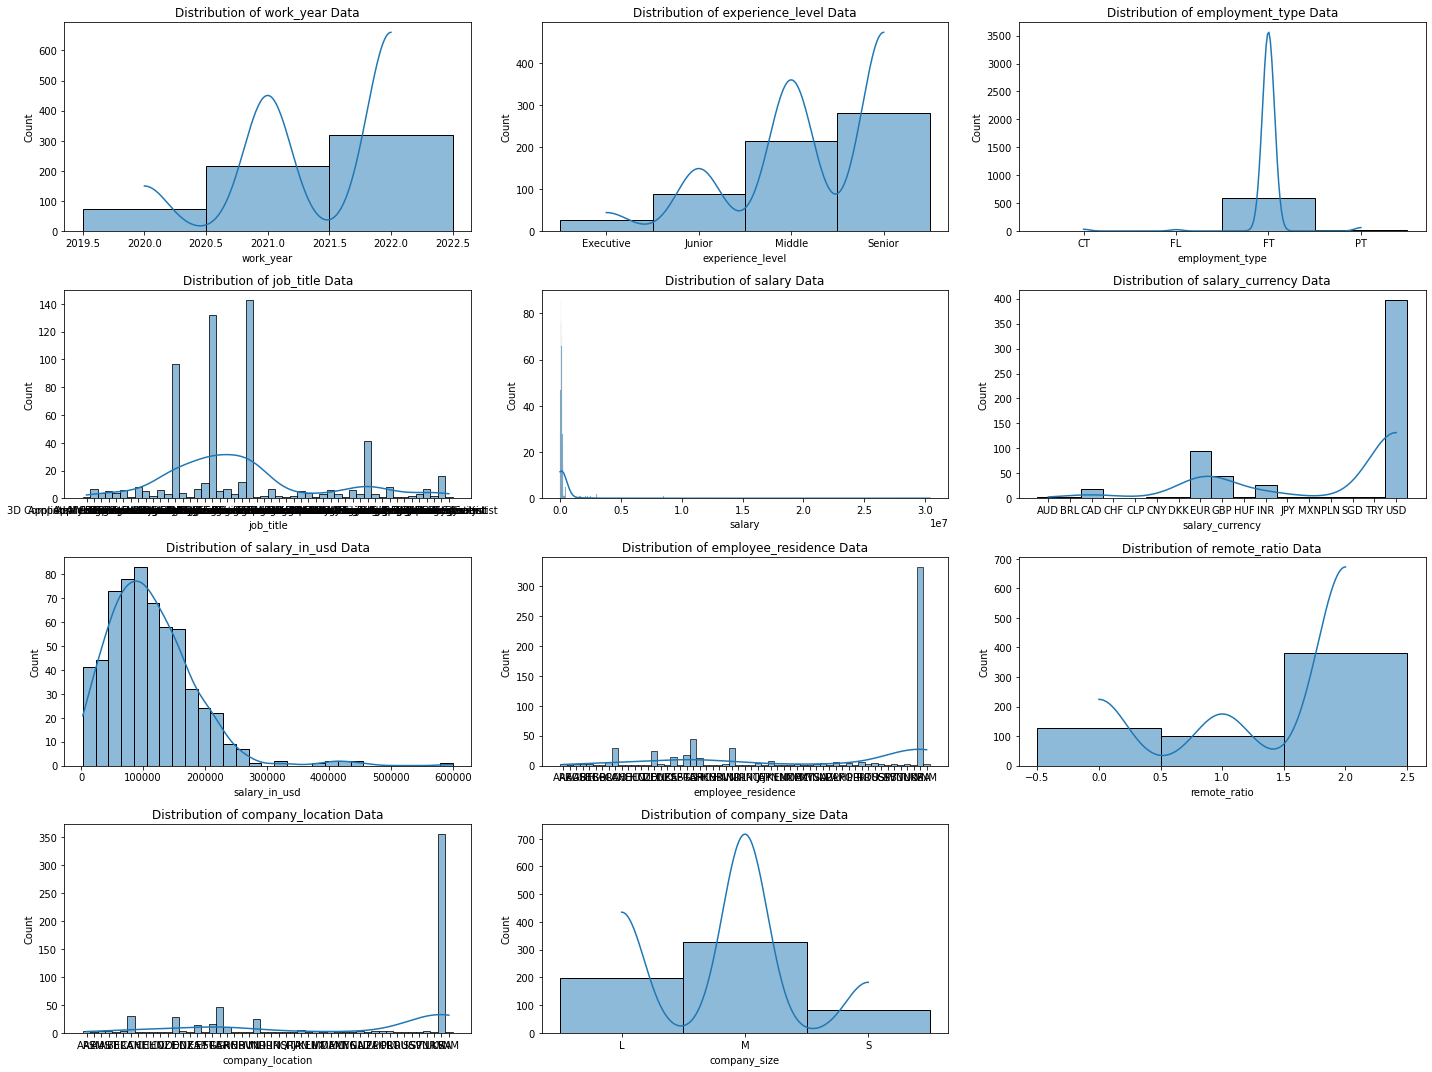

In [15]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df_pre.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of " + col +  " Data")
    sns.histplot(df_pre[col],kde=True)
    plt.tight_layout()
    plt.plot()

the above charts suggests:
- we should maybe categorize the countries by some other feature to get a better overview that could be more helpfull
- Job titles could be categorized into 4-8 names rather than what we have
- Most of the jobs are Full time jobs 

In [16]:
fig = px.histogram(df, x = 'salary_in_usd', color = 'work_year', marginal="box", opacity = 0.8,
                   color_discrete_sequence = ['black', 'gray', 'blue'])

fig.update_layout(width = WIDTH, title_text="Distribution of Salaries per Year")
fig.show()

In [17]:
df_mean = df.groupby('company_location')[['salary_in_usd']].mean().sort_values('salary_in_usd', ascending = False)
fig_bar = px.bar(x = df_mean.head(20).index, y = df_mean.head(20).salary_in_usd, color = df_mean.head(20).salary_in_usd, color_continuous_scale='dense')
fig_bar.update_layout(width = WIDTH, height = 500, title_text="TOP 20 Salary by Company Location")
fig_bar.update_xaxes(title = 'Country')
fig_bar.update_yaxes(title = 'Salary in USD')
fig_bar.show()

In [18]:
fig = px.choropleth(locations=df_mean.index,
                    color=df_mean['salary_in_usd'],
                    color_continuous_scale='dense',
                    title = 'Mean Salary by Location')


fig.update_layout(width = WIDTH, height = 600, title_text="Salary by Company Location")
fig.show()


In [19]:
df_jobs = df['job_title'].value_counts(ascending = True).reset_index().tail(10)


fig = go.Figure(go.Bar(y = df_jobs['index'], x = df_jobs['job_title'],orientation='h',  marker = dict(color = 'black', opacity = 0.8)))
fig.update_layout(width = WIDTH,height = 500, title_text="Job Title Distribution",showlegend=False)
fig.show()

most jobs titles are: Data scientest , Data Engineer , Data Analyst, ML Eng
we may try to reduce job titles into 4 or so jobs

In [20]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

## Feature Engineering :

In [21]:
def Feature_Eng(data):
    data_c = data.copy()
    
    ML_Eng = [job for job in data['job_title'].unique() if 'Machine' in job]
    Data_Analyst = [ job for job in data['job_title'].unique() if 'Analy' in job ]
    Data_Scientest = [ job for job in data['job_title'].unique() if 'Scien' in job ]
    
    data_c['new_title'] = ''
    for i,v in enumerate(data['job_title']):
        if v in ML_Eng :
            data_c['new_title'][i] = 'ML Engineer'
            
        elif v in Data_Analyst:
            data_c['new_title'][i] = 'Data Analyst'
            
        elif v in Data_Scientest :
            data_c['new_title'][i] = "Data Scientest"
    
        else:
            data_c['new_title'][i] = "Data Engineer"
        
    data_c['new_title'] = data_c['new_title'].astype("category")
         # now we have only 4 diffrent jobs insted of +25 titles
        
    ## next will create a feature for 1st,2nd and 3rd world countries wich will depend on 
    ## Countries GDP that could be found in Wekipidia
    
    
    
    First_World = ['CHN','NZL','ISR','JPN','GBR','DEU','FRA','RUS','ITA','BRA']
    Second_World = ['AUS','IRN','ESP','MEX','NLD','CHE','TWN']
    
    data_c['World_Location'] = ''

    for i,v in enumerate(data['company_location']):
        if v in First_World :
            data_c['World_Location'][i] = '1st'

        elif v in Second_World:
            data_c['World_Location'][i] = '2nd'

        else:
            data_c['World_Location'][i] = "3rd"
            

    data_c['World_Location'] = data_c['World_Location'].astype("category")
    
    ## lets try to add new features:
    data_c['remote_ratio'] = data_c['remote_ratio'].astype("int")
    data_c['company_size'] = data_c['company_size'].map({'S':'0', 'M':'1','L':'2'}).astype('int')

    
    data_c['country_mean_salary'] = data_c.groupby('company_location')['salary_in_usd'].transform('mean')
    data_c['country_min_salary'] = data_c.groupby('company_location')['salary_in_usd'].transform('min')  
    data_c['country_max_salary'] = data_c.groupby('company_location')['salary_in_usd'].transform('max')






    data_c.drop(['salary_currency','salary'], axis = 1,inplace = True) 

    return data_c    
        
        
        

In [22]:
def drop_uninformative(data, mi_scores):
    
    return data.loc[:, mi_scores > 0.00]

## will drop features with that isn't realated

In [23]:
df_copy = df.copy()
df_copy= Clean_Data(df_copy)
df_copy = Feature_Eng(df_copy)

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   work_year            607 non-null    category
 1   experience_level     607 non-null    category
 2   employment_type      607 non-null    category
 3   job_title            607 non-null    category
 4   salary_in_usd        607 non-null    int64   
 5   employee_residence   607 non-null    category
 6   remote_ratio         607 non-null    int64   
 7   company_location     607 non-null    category
 8   company_size         607 non-null    int64   
 9   new_title            607 non-null    category
 10  World_Location       607 non-null    category
 11  country_mean_salary  607 non-null    float64 
 12  country_min_salary   607 non-null    int64   
 13  country_max_salary   607 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 62.3 KB


In [25]:
from sklearn.feature_selection import mutual_info_regression

In [26]:
Y = df_copy['salary_in_usd']
df_mi = df_copy.drop('salary_in_usd',axis = 1)
df_mi = pd.get_dummies(df_mi)
mi_scores = mutual_info_regression(df_mi ,Y, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df_mi.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

country_max_salary                                    0.453069
country_mean_salary                                   0.421333
country_min_salary                                    0.386473
employee_residence_USA                                0.328366
company_location_USA                                  0.287058
experience_level_Senior                               0.184811
World_Location_3rd                                    0.111339
company_location_GBR                                  0.091383
work_year_2022                                        0.090798
new_title_Data Analyst                                0.087106
experience_level_Junior                               0.080174
job_title_Data Analyst                                0.077427
World_Location_1st                                    0.076801
employee_residence_IND                                0.075968
work_year_2021                                        0.073204
employee_residence_GBR                                0

## PCA:


In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def PCA_(data, n):
    
    df_s = pd.get_dummies(data, drop_first = True)
    
    #cols = ['country_mean_salary','country_min_salary','country_max_salary']
    #df_s[cols] = StandardScaler().fit_transform(df_s[cols])
    
    
    pca = PCA(n_components=n)
    x = pca.fit_transform(df_s)
    component_names = [f"PC{i+1}" for i in range(x.shape[1])]
    x = pd.DataFrame(x, columns=component_names)
    x2 = df_s.copy()
    for k in x.columns:
        x2[k] = x['PC1']
        for i in range(x.shape[0]):
            x2[k][i] = x[k][i]
    return x2

#PCA could be helpfull but in our case it didn't help much cause the data is small and has so many ouliers

In [28]:
df_copy = pd.get_dummies(df_copy)
Y= df_copy['salary_in_usd']
X = df_copy.drop('salary_in_usd',axis = 1)

#X = PCA_(X,5)

In [29]:
X.head()

,remote_ratio,company_size,country_mean_salary,country_min_salary,country_max_salary,work_year_2020,work_year_2021,work_year_2022,experience_level_Executive,experience_level_Junior,...,company_location_UKR,company_location_USA,company_location_VNM,new_title_Data Analyst,new_title_Data Engineer,new_title_Data Scientest,new_title_ML Engineer,World_Location_1st,World_Location_2nd,World_Location_3rd
0,0,2,81887.214286,15966,173762,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,114127.333333,41689,260000,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,1,81583.042553,37300,183228,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,20000.000000,20000,20000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,2,144055.261972,5679,600000,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [30]:
mi_scores = mutual_info_regression(X ,Y, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
X = drop_uninformative(X,mi_scores)

## Train/Test split :

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=30)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

## XGBoost with SearchCV

In [33]:
xgr = XGBRegressor()

In [34]:
param_lst = {
    "learning_rate" : [0.07,0.05,0.04,0.02,0.01],
    "n_estimators" : [50,80,100,200,300,400,500],
    "max_depth" : [2,4,8,10],
    "min_child_weight" : [1,5,10,20,30],
    "reg_alpha" : [0.001,0.01,0.1],
    "reg_lambda" : [0.001,0.01,0.1]
    
}

##you could try to tune this better

In [35]:
xgREg = RandomizedSearchCV(estimator=xgr,param_distributions=param_lst,
                            n_iter = 5,scoring="neg_root_mean_squared_error",cv = 3,random_state=30)


In [36]:
xgREg = xgREg.fit(X_train,y_train)

best_param = xgREg.best_params_

xgREg = XGBRegressor(**best_param)

In [37]:
def mean_cross_value(model,X,y):
    score = cross_val_score(model,X,y,cv=5)
    mean = score.mean()
    return mean

In [38]:
xgREg.fit(X_train,y_train)
preds = xgREg.predict(X_test)
mae_xgb = mean_absolute_error(y_test,preds)
rmse_xgb = np.sqrt(mean_absolute_error(y_test,preds))
score_xgb = xgREg.score(X_test,y_test)
cv_xgb = mean_cross_value(xgREg,X,Y)

In [39]:
model_performances = pd.DataFrame({
    "Model":["XGBoost"],
    "CV(5)" : [str(cv_xgb)],
    "MAE" : [str(mae_xgb)],
    "RMSE" : [str(rmse_xgb)],
})
model_performances


,Model,CV(5),MAE,RMSE
0,XGBoost,0.5015436170570272,27892.70168201959,167.01108251256738


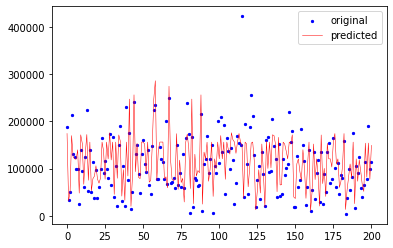

In [40]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, preds, lw=0.5, color="red", label="predicted")
plt.legend()
plt.show()



So our model has an MAE of 27900 and 167 RMSE,
I hope that you can easly understand this notebook and be able to improve it by making better
features or using other models that might perform better than XGBoost
## :)
